# Súčin dvojrozmerných normálnych rozdelení

Pre súčin dvojrozmerných funkcií je možné odvodiť - [link](http://www.tina-vision.net/docs/memos/2003-003.pdf), podobne ako pri jednorozmernom prípade, vzťahy pre strednú hodnotu a rozptyl

\begin{equation}
\mu = \Sigma_2 \, (\Sigma_1 + \Sigma_2)^{-1}\, \mu_1 + \Sigma_1 \, (\Sigma_1 + \Sigma_2)^{-1}\, \mu_2
\end{equation}

\begin{equation}
\Sigma = \Sigma_1 \, (\Sigma_1 + \Sigma_2)^{-1} \, \Sigma_2
\end{equation}

<b>Príklad</b> 

Pre dve dvojrozmerné rozdelenia spočítame určíme vlastnosti súčinu <i>pdf</i> rozdelení. 

\begin{equation}
\textbf{X} \sim \mathcal{N}(\boldsymbol\mu_1, \boldsymbol\Sigma_1), \quad
\boldsymbol\mu_1 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \quad
\boldsymbol\Sigma_1 = \begin{bmatrix} 5 & 2.5 \\
                    2.5  & 2 \end{bmatrix}
\end{equation}

\begin{equation}
\textbf{Y} \sim \mathcal{N}(\boldsymbol\mu_2, \boldsymbol\Sigma_2), \quad
\boldsymbol\mu_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \quad
\boldsymbol\Sigma_2 = \begin{bmatrix} 6 & -4 \\
                    -4  & 3 \end{bmatrix}
\end{equation}

Pre výpočet vektora strednej hodnoty a hodnoty kovariančnej matice súčinu môžeme použiť funkciu pre maticové násobenie troch maticových argumentov \texttt{dot3()} alebo priamo funkciu pre násobenie \textit{pdf} dvoch N-rozmerných normálnych \texttt{multivariate\_multiply()}z knižnice \textit{filterpy}. 

In [1]:
%reset -f  
%matplotlib inline

# Priklad - Sucin dvoch normalnych rozdeleni

from numpy import array, dot
from numpy.linalg import inv

dot3 = lambda m1,m2,m3: dot(dot(m1,m2), m3)  

S1=array([[5, 2.5], [2.5, 2]])
m1=array([0,0])

S2=array([[6, -4], [-4, 3]])
m2=array([1,1])

m3 = dot3(S2, inv(S1 + S2), m1) + dot3(S1, inv(S1 + S2), m2)
S3 = dot3(S1, inv(S1 + S2), S2)

print('Mean \n',m3)
print()
print('Sigma\n',S3)

Mean 
 [ 1.20853081  0.78199052]

Sigma
 [[ 0.61611374 -0.18957346]
 [-0.18957346  0.28909953]]


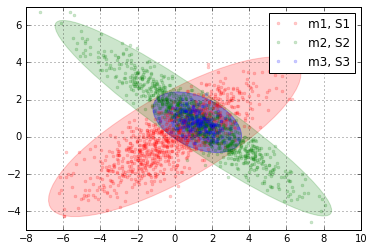

In [2]:
from numpy.random import multivariate_normal
import matplotlib.pylab as plt
from src.utils import *

# Priklad - Zobrazenie sucinu dvoch normalnych rozdeleni

fig = plt.figure(0)

X1, Y1 = multivariate_normal(m1, S1, 1000).T
plt.plot(X1, Y1, 'r.', alpha=.2, label='m1, S1')
cov_ellipse(fig, m1,S1, ec='r', fc='r', alpha = 0.2)

X2, Y2 = multivariate_normal(m2, S2, 1000).T
plt.plot(X2, Y2, 'g.', alpha=.2, label='m2, S2')
cov_ellipse(fig, m2,S2, ec='g', fc='g', alpha = 0.2)

X3, Y3 = multivariate_normal(m3, S3, 250).T
cov_ellipse(fig, m3,S3, ec='b', fc='b', alpha=0.3)
plt.plot(X3, Y3, 'b.', alpha=.2, label='m3, S3')

plt.xlim(-10,10)
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()